In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [3]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [4]:
clf = clf.fit(X, y)

In [5]:
clf.predict([[2., 2.]])

array([1])

In [6]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [8]:
import scipy
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [10]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

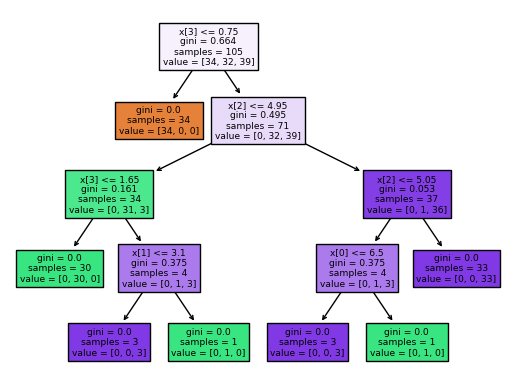

In [13]:
tree.plot_tree(clf, filled=True)

In [14]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

In [15]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [16]:
clf.score(X_test, y_test)

0.9777777777777777

In [19]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.6573426573426573
0.8881118881118881
0.7972027972027972
0.6013986013986014
0.7552447552447552
0.951048951048951
0.6013986013986014
0.8881118881118881
0.8881118881118881
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Charger les données iris
iris = load_iris()
X, y = iris.data, iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les hyperparamètres à rechercher
param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 5, 10, 15, 20]
}

# Créer un objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Afficher la meilleure combinaison d'hyperparamètres et sa précision
print("Meilleure combinaison d'hyperparamètres :", grid_search.best_params_)
print("Précision sur l'ensemble de test :", grid_search.best_estimator_.score(X_test, y_test))


Meilleure combinaison d'hyperparamètres : {'max_depth': 3, 'min_samples_split': 2}
Précision sur l'ensemble de test : 1.0


C:\Users\meuni\AppData\Local\Temp\ipykernel_22192\1133000338.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


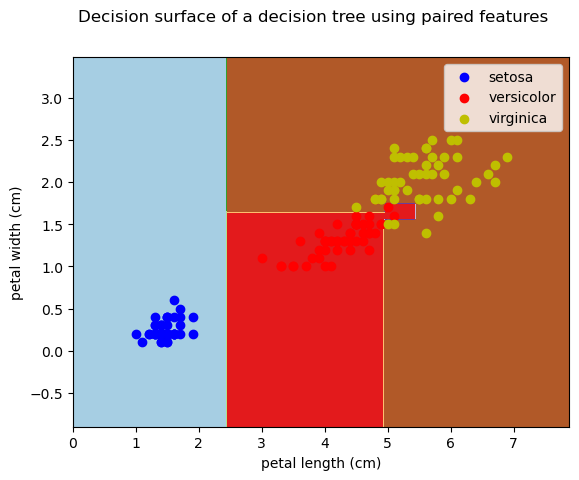

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

C:\Users\meuni\AppData\Local\Temp\ipykernel_22192\3181647490.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[idx, pair[0]], X[idx, pair[1]], c=color, label=iris.target_names[j], cmap=plt.cm.Paired)
C:\Users\meuni\AppData\Local\Temp\ipykernel_22192\3181647490.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[idx, pair[0]], X[idx, pair[1]], c=color, label=iris.target_names[j], cmap=plt.cm.Paired)
C:\Users\meuni\AppData\Local\Temp\ipykernel_22192\3181647490.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[idx, pair[0]], X[idx, pair[1]], c=color, label=iris.target_names[j], cmap=plt.cm.Paired)
C:\Users\meuni\AppData\Local\Temp\ipykernel_22192\3181647490.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[idx, pair[0]], X[idx, pair[1]], c=color, 

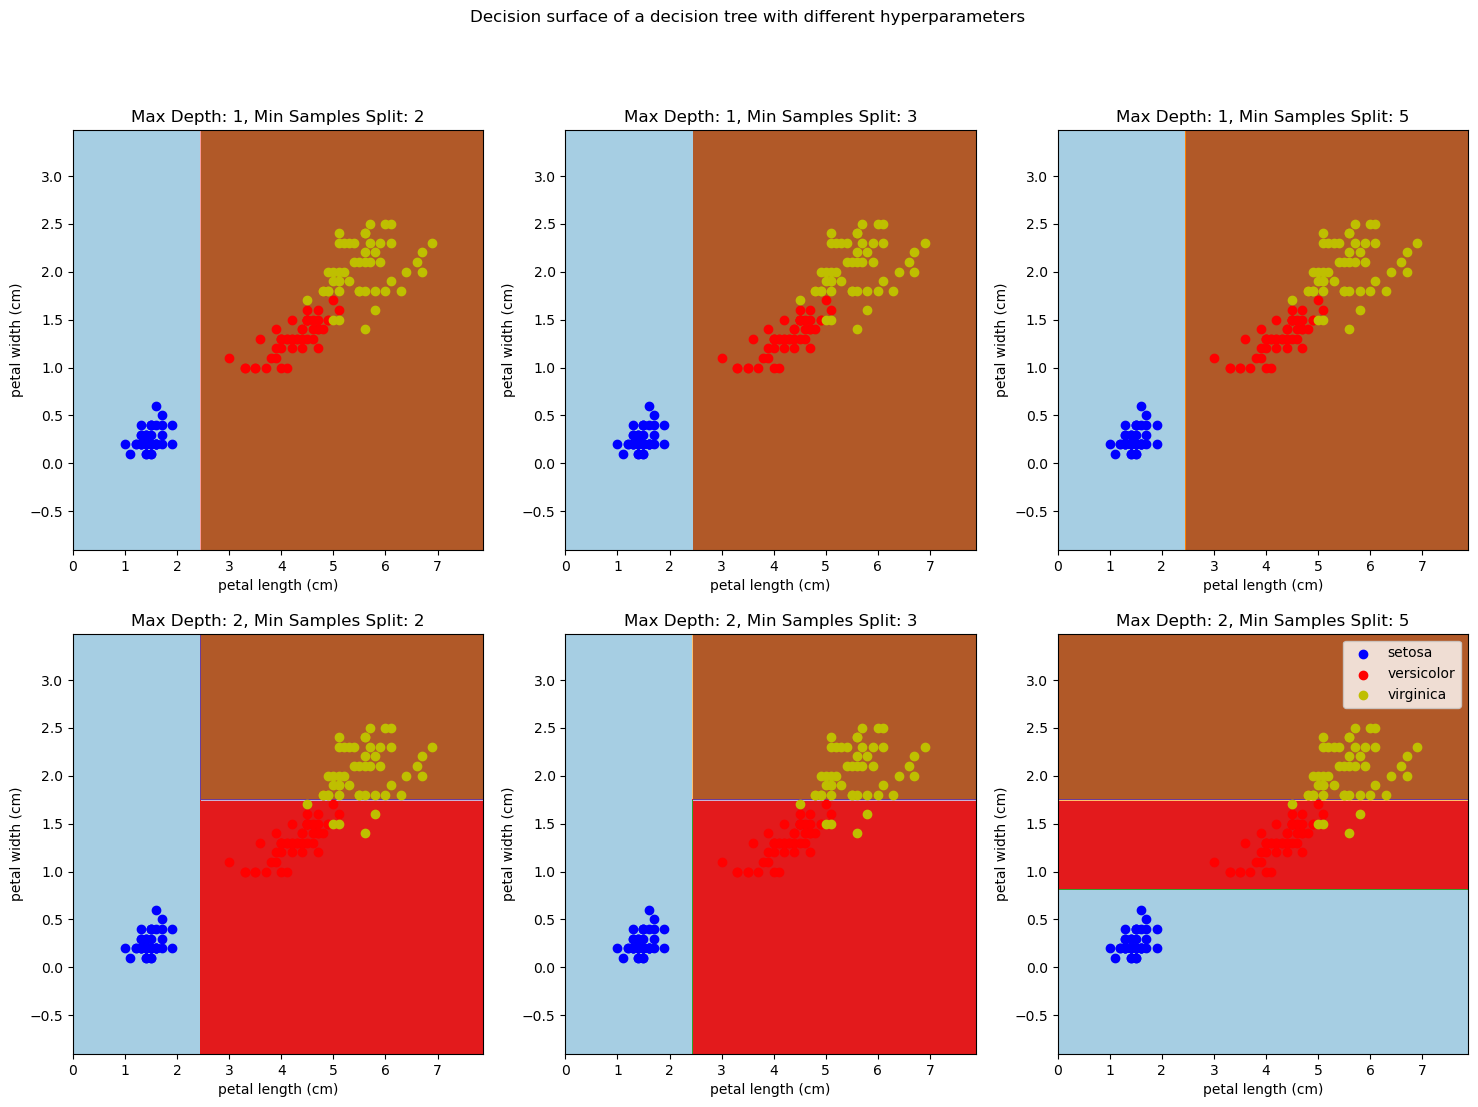

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Charger les données iris
iris = load_iris()
X, y = iris.data, iris.target

# Paramètres pour les graphiques
n_classes = 3
plot_colors = "bry"
plot_step = 0.02
pair = [2, 3]  # attributs longueur et largeur des pétales

# Hyperparamètres à rechercher
param_grid = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7],
    "min_samples_split": [2, 3, 5, 10, 15, 20]
}

# Créer un objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(X, y)

# Afficher les surfaces de décision pour chaque combinaison d'hyperparamètres
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, ax in enumerate(axes.flat):
    ix, iy = divmod(i, 3)
    clf = DecisionTreeClassifier(max_depth=param_grid['max_depth'][ix], min_samples_split=param_grid['min_samples_split'][iy])
    clf.fit(X[:, pair], y)
    
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.set_xlabel(iris.feature_names[pair[0]])
    ax.set_ylabel(iris.feature_names[pair[1]])
    ax.axis("tight")

    for j, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == j)
        ax.scatter(X[idx, pair[0]], X[idx, pair[1]], c=color, label=iris.target_names[j], cmap=plt.cm.Paired)
    ax.axis("tight")
    ax.set_title(f"Max Depth: {param_grid['max_depth'][ix]}, Min Samples Split: {param_grid['min_samples_split'][iy]}")

plt.suptitle("Decision surface of a decision tree with different hyperparameters")
plt.legend()
plt.show()
